Part II
1. Baseline Training

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    
])



In [4]:
train_dataset = datasets.ImageFolder(
    root="train",
    transform=train_transform
)

val_dataset = datasets.ImageFolder(
    root="test",
    transform=train_transform
)


In [5]:
batch_size = 4

In [6]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [7]:
import json

# Assuming 'train_dataset' has an attribute 'classes' that stores class labels
class_labels = train_dataset.classes
with open('class_labels.json', 'w') as f:
    json.dump(class_labels, f)


torch.Size([4, 3, 256, 256])


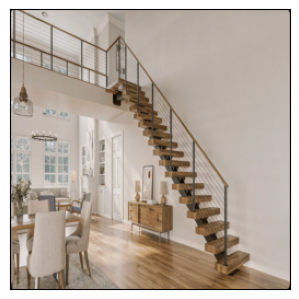

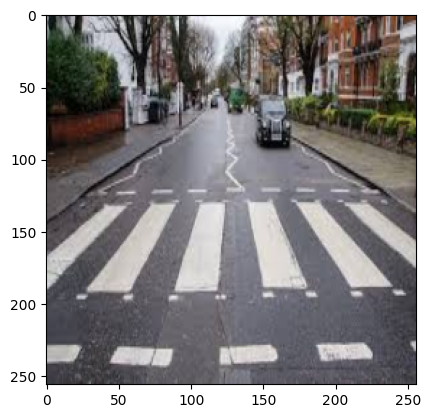

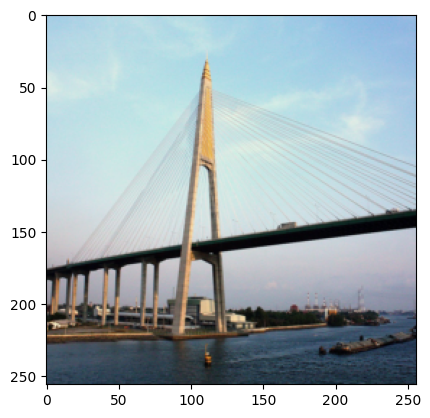

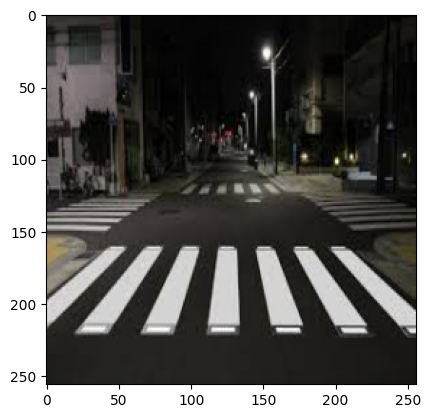

In [8]:
# Function to show images
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # convert from Tensor image
    plt.imshow(img)
    plt.show()

# Get a batch of training data
images, labels = next(iter(train_loader))
print(images.shape)
# Show images
fig = plt.figure(figsize=(8, 8))
for idx in range(batch_size):
    ax = fig.add_subplot(2, 2, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(train_dataset.classes[labels[idx]])

In [9]:
num_classes = len(train_dataset.classes)
print(train_dataset.classes)  


['Bridge', 'Crosswalk', 'Stair']


In [10]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        
        # Update the linear layer to accommodate larger feature map size
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Increased the output features of fc1 for potentially better learning
        self.fc2 = nn.Linear(128, num_classes)  # Output layer for two classes

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Activation after first convolution
        x = self.pool(x)           # First pooling reduces spatial dimensions
        x = F.relu(self.conv2(x))  # Activation after second convolution
        x = self.pool(x)           # Second pooling reduces dimensions further
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))    # First fully connected layer with activation
        x = self.fc2(x)            # Output layer
        return x


In [11]:
import torch.optim as optim

# Assuming SimpleCNN and train_loader are defined and properly initialized
model = SimpleCNN(num_classes=3)  # Be sure num_classes matches the number of your classes
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20



for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Clear gradients for this training step
        outputs = model(images)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        running_loss += loss.item()  # Update running loss
        if i % 10 ==0:
            print(f'Epoch [{epoch+1}/{epochs}], Batch [{i+1}/{len(train_loader)}], Batch Loss: {loss.item():.4f}')  # Print loss for each batch

    epoch_loss = running_loss / len(train_loader)  # Calculate average loss for the epoch
    print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {epoch_loss:.4f}')  # Print average loss after the epoch


Epoch [1/20], Batch [1/8], Batch Loss: 1.1074
Epoch [1/20], Average Loss: 1.2923
Epoch [2/20], Batch [1/8], Batch Loss: 0.9499
Epoch [2/20], Average Loss: 0.8482
Epoch [3/20], Batch [1/8], Batch Loss: 0.4919
Epoch [3/20], Average Loss: 0.5660
Epoch [4/20], Batch [1/8], Batch Loss: 0.2649
Epoch [4/20], Average Loss: 0.2692
Epoch [5/20], Batch [1/8], Batch Loss: 0.0351
Epoch [5/20], Average Loss: 0.0406
Epoch [6/20], Batch [1/8], Batch Loss: 0.0318
Epoch [6/20], Average Loss: 0.0958
Epoch [7/20], Batch [1/8], Batch Loss: 0.0162
Epoch [7/20], Average Loss: 0.0095
Epoch [8/20], Batch [1/8], Batch Loss: 0.0198
Epoch [8/20], Average Loss: 0.0047
Epoch [9/20], Batch [1/8], Batch Loss: 0.0001
Epoch [9/20], Average Loss: 0.0016
Epoch [10/20], Batch [1/8], Batch Loss: 0.0000
Epoch [10/20], Average Loss: 0.0002
Epoch [11/20], Batch [1/8], Batch Loss: 0.0006
Epoch [11/20], Average Loss: 0.0002
Epoch [12/20], Batch [1/8], Batch Loss: 0.0000
Epoch [12/20], Average Loss: 0.0001
Epoch [13/20], Batch [

In [12]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')


Validation Accuracy: 50.00%


In [13]:
torch.save(model.state_dict(), 'model_1.pth')


Part II 
2. Augmented Training

In [14]:
train_transform_Augment = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),     # Randomly rotate images by ±10 degrees
    transforms.ToTensor(),
    
])



In [15]:
train_dataset_aug = datasets.ImageFolder(
    root="train",
    transform=train_transform_Augment
)

val_dataset_aug = datasets.ImageFolder(
    root="test",
    transform=train_transform_Augment
)


In [16]:
batch_size_aug = 4

In [17]:
train_loader_aug = DataLoader(train_dataset_aug, batch_size=batch_size, shuffle=True)
val_loader_aug = DataLoader(val_dataset_aug, batch_size=batch_size, shuffle=False)


torch.Size([4, 3, 256, 256])


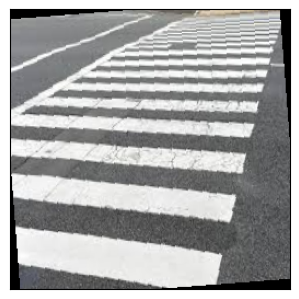

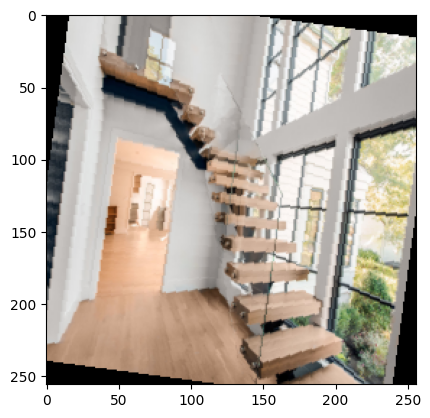

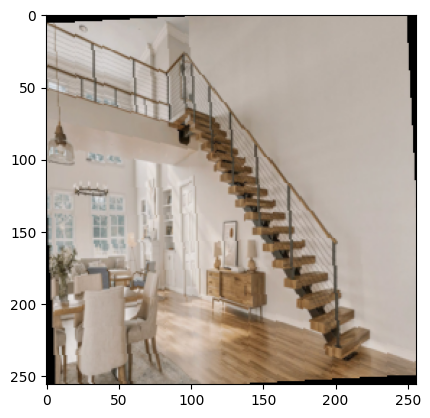

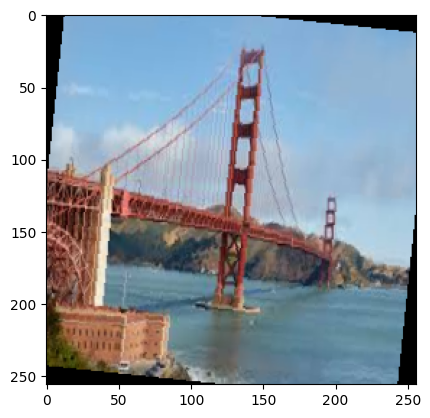

In [18]:
# Function to show images
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # convert from Tensor image
    plt.imshow(img)
    plt.show()

# Get a batch of training data
images, labels = next(iter(train_loader_aug))
print(images.shape)
# Show images
fig = plt.figure(figsize=(8, 8))
for idx in range(batch_size_aug):
    ax = fig.add_subplot(2, 2, idx + 1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(train_dataset_aug.classes[labels[idx]])

In [19]:
num_classes = len(train_dataset_aug.classes)
print(train_dataset_aug.classes)  


['Bridge', 'Crosswalk', 'Stair']


In [20]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        
        # Update the linear layer to accommodate larger feature map size
        self.fc1 = nn.Linear(32 * 64 * 64, 128)  # Increased the output features of fc1 for potentially better learning
        self.fc2 = nn.Linear(128, num_classes)  # Output layer for two classes

    def forward(self, x):
        x = F.relu(self.conv1(x))  # Activation after first convolution
        x = self.pool(x)           # First pooling reduces spatial dimensions
        x = F.relu(self.conv2(x))  # Activation after second convolution
        x = self.pool(x)           # Second pooling reduces dimensions further
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))    # First fully connected layer with activation
        x = self.fc2(x)            # Output layer
        return x


In [21]:
import torch.optim as optim

# Assuming SimpleCNN and train_loader are defined and properly initialized
model = SimpleCNN(num_classes=3)  # Be sure num_classes matches the number of your classes
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20



for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader_aug):
        optimizer.zero_grad()  # Clear gradients for this training step
        outputs = model(images)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        running_loss += loss.item()  # Update running loss
        if i % 10 ==0:
            print(f'Epoch [{epoch+1}/{epochs}], Batch [{i+1}/{len(train_loader_aug)}], Batch Loss: {loss.item():.4f}')  # Print loss for each batch

    epoch_loss = running_loss / len(train_loader_aug)  # Calculate average loss for the epoch
    print(f'Epoch [{epoch+1}/{epochs}], Average Loss: {epoch_loss:.4f}')  # Print average loss after the epoch


Epoch [1/20], Batch [1/8], Batch Loss: 1.0957
Epoch [1/20], Average Loss: 5.9596
Epoch [2/20], Batch [1/8], Batch Loss: 2.2519
Epoch [2/20], Average Loss: 1.3357
Epoch [3/20], Batch [1/8], Batch Loss: 1.4180
Epoch [3/20], Average Loss: 1.0734
Epoch [4/20], Batch [1/8], Batch Loss: 0.9253
Epoch [4/20], Average Loss: 0.9311
Epoch [5/20], Batch [1/8], Batch Loss: 0.8575
Epoch [5/20], Average Loss: 0.6091
Epoch [6/20], Batch [1/8], Batch Loss: 0.4125
Epoch [6/20], Average Loss: 0.3707
Epoch [7/20], Batch [1/8], Batch Loss: 0.8450
Epoch [7/20], Average Loss: 0.4349
Epoch [8/20], Batch [1/8], Batch Loss: 0.1712
Epoch [8/20], Average Loss: 0.3949
Epoch [9/20], Batch [1/8], Batch Loss: 0.3155
Epoch [9/20], Average Loss: 0.2871
Epoch [10/20], Batch [1/8], Batch Loss: 0.1169
Epoch [10/20], Average Loss: 0.1444
Epoch [11/20], Batch [1/8], Batch Loss: 0.0016
Epoch [11/20], Average Loss: 0.2209
Epoch [12/20], Batch [1/8], Batch Loss: 0.4244
Epoch [12/20], Average Loss: 0.2254
Epoch [13/20], Batch [

In [22]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader_aug:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')


Validation Accuracy: 80.00%


In [23]:
torch.save(model.state_dict(), 'model_2.pth')


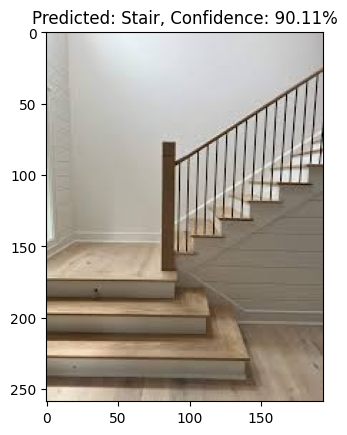

In [24]:
import json
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load class labels
with open('class_labels.json', 'r') as f:
    class_labels = json.load(f)

# Load the model
model_aug = SimpleCNN(num_classes=len(class_labels))
model_aug.load_state_dict(torch.load('model_2.pth'))
model_aug.eval()

# Load and transform the image1
image_path = "test/Stair/2.jpg"
image = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
image = transform(image).unsqueeze(0)  # Add batch dimension

# Predict
with torch.no_grad():
    outputs = model_aug(image)
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    max_prob, predicted = torch.max(probabilities, 1)

# Display the image and prediction
image_display = Image.open(image_path)
plt.imshow(image_display)
predicted_class = class_labels[predicted.item()]
plt.title(f'Predicted: {predicted_class}, Confidence: {max_prob.item()*100:.2f}%')
plt.show()
